<a href="https://colab.research.google.com/github/soyoonjeong/deeplearning_from_scratch/blob/main/ch2_%EC%9E%90%EC%97%B0%EC%96%B4%EC%99%80_%EB%8B%A8%EC%96%B4%EC%9D%98_%EB%B6%84%EC%82%B0_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
%cd /content/drive/MyDrive

/content/drive/MyDrive


- WordNet 등의 시소러스를 이용하면 유의어를 얻거나 단어 사이의 유사도를 측정하는 등 유용한 작업을 할 수 있다.
- 시소러스 기반 기법은 시소러스를 작성하는 데 엄청난 인적 자원이 든다거나 새로운 단어에 대응하기 어렵다는 문제가 있다.
- 현재는 말뭉치를 이용해 단어를 벡터화하는 방식이 주로 쓰인다.
- 최근의 단어 벡터화 기법들은 대부분 '단어의 의미는 주변 단어에 의해 형성된다'는 분포 가설에 기초한다.
- 통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계 (동시발생 행렬)
- 동시발생 행렬을 PPMI 행렬로 변환하고 다시 차원을 감소시킴으로써, 거대한 희소벡터를 작은 밀집벡터로 변환할 수 있다.
- 단어의 벡터 공간에서의 의미가 가까운 단어는 그 거리도 가까울 것으로 기대된다. 

# 자연어 처리란

**자연어** : 우리가 평소에 쓰는 말 <br>
**자연어 처리(NLP)** :  우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야) <br>
자연어는 살아있는 언어이며 부드러운 언어이기에 컴퓨터에게 이해시키기 어렵다 <br>
컴퓨터에게 자연어를 이해시킬 수 있다면 검색 엔진, 기계 번역, 질의응답 시스템, IME(입력기 전환), 문장 자동요약, 감정분석 등 도움이 될 수 있음

## 단어의 의미

**단어** : 의미의 최소 단위 <BR>
컴퓨터에게 단어의 의미 이해시키기 위한 기법<BR>
- 시소러스를 활용한 기법
- 통계 기반 기법
- 추론 기반 기법

# 시소러스 

- 동의어, 유의어 집합 만듦
- '상위와 하위', '전체와 부분' 등 단어들 간의 관계를 그래프로 표현해 단어 사이의 연결(단어 네트워크) 정의 <br>
=> 컴퓨터에게 '단어의 의미'를 직간접적으로 전달달

## WordNet

## 시소러스의 문제점 

- 시대 변화에 대응하기 어렵다 <br>
새로운 단어가 생겨나고 옛말은 잊혀지고 단어의 의미가 변함
- 사람을 쓰는 비용은 크다 <br>
- 단어의 미묘한 차이를 표현할 수 없다 <br>
비슷한 단어라도 미묘한 차이가 있을 수 있음 ex) 빈티지, 레트로 

solution : 통계 기반 기법, 추론 기반 기법 => 대량의 텍스트 데이터로부터 단어의 의미를 자동으로 추출 

# 통계 기반 기법 

**말뭉치(corpus)** : 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 텍스트 데이터<br>
말뭉치에는 자연어에 대한 사람의 '지식'이 충분히 담김 <br>
=> 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출하는 것!

## 파이썬으로 말뭉치 전처리하기
텍스트 데이터를 단어로 분할하고 그 분할된 단어들을 단어 ID 목록으로 변환하기 

In [3]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')
  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in  word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

## 단어의 분산 표현
: 단어를 고정 길이의 밀집 벡터로 표현
- 단어의 의미를 정확하게 명시
- 단어끼리의 관련성을 쉽게 판단할 수 있음음

## 분포 가설 
: 단어 자체에는 의미가 없고, 그 단어가 사용된 **맥락**이 의미를 형성한다!<br>
여기서의 맥락은 주목하는 단어 주변에 놓인 단어를 말함함

## 동시발생 행렬
**통계 기반 기법** : 어떤 단어에 주목했을 때 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법 

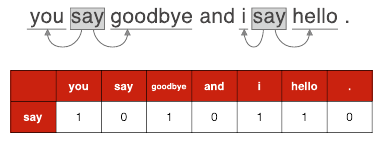

In [4]:
def create_co_matrix(corpus, vocab_size, window_size = 1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix

## 벡터 간 유사도 

**코사인 유사도** : 단어 벡터의 유사도를 나타낼 때 자주 이용 => **두 벡터가 가리키는 방향이 얼마나 비슷한가**<br>
벡터를 정규화하고 내적을 구하는 것! <br>
벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되고 완전히 반대라면 -1

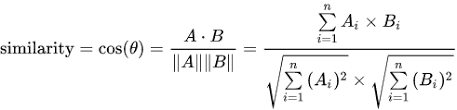

In [5]:
def cos_similarity(x, y, eps = 1e-8):
  nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
  ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
  return np.dot(nx, ny)

In [6]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


## 유사 단어의 랭킹 표시

In [22]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
  # 검색어의 단어 벡터 꺼내기 
  if query not in word_to_id:
    print("%s를 찾을 수 없습니다." %query)
    return

  print('\n[query] ' + query)
  query_id = word_to_id[query]
  query_matrix = word_matrix[query_id]

  # 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도 각각 구함
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_matrix)

  # 코사인 유사도를 기준으로 내림차순 출력
  count = 0
  for i in (-1 * similarity).argsort():
    if id_to_word[i] == query:
      continue
    print("%s : %s" %(id_to_word[i], similarity[i]))

    count+=1
    if count>=top:
      return

In [23]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
 
most_similar('you', word_to_id, id_to_word, C, top = 5)


[query] you
goodbye : 0.7071067691154799
i : 0.7071067691154799
hello : 0.7071067691154799
say : 0.0
and : 0.0


말뭉치의 크기가 너무 작아 결과가 만족스럽지 못함 

# 통계 기반 기법 개선하기 

## 상호정보량

PROBLEM : 두 단어가 동시에 발생한 횟수는 관련성과 관련이 거의 없음<BR>
ex) 단순 등장 횟수를 본다면 'the'가 고빈도 단어라 'drive'보다 더 'car'와 관련성을 가진다고 봄

SOLUTION : **점별 상호정보량(PMI)** <br>
단어가 단독으로 출현하는 횟수가 고려됨됨

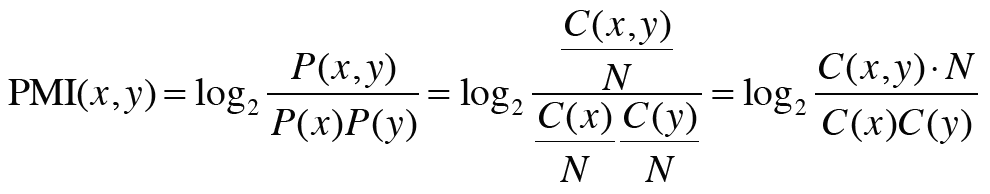

두 단어의 동시발생 횟수가 0이면 음의 무한대 <br>
=> 양의 상호정보량(PPMI) = max(0, PMI(x, y)

In [14]:
def ppmi(C, verbose = False, eps = 1e-8):
  M = np.zeros_like(C, dtype = np.float32)
  N = np.sum(C) # 전체 출현 횟수
  S = np.sum(C, axis = 0) # 단어당 단독 출현 횟수
  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[i] * S[j]) + eps)
      M[i, j] = max(0, pmi)

      if verbose:
        cnt += 1
        if cnt % (total//100+1) == 0:
          print("%.1f%% 완료" %(100*cnt/total))
  return M


In [15]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)
print(W)

[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


- 말뭉치의 어휘 수가 증가함에 따라 각 단어 벡터의 차원 수도 증가
- 원소 대부분이 0 => 원소 대부분 중요도가 낮음, 노이즈에 약하고 견고하지 못함함

## 차원 감소

희소벡터에서 중요한 축을 찾아내어 더 적은 차원으로 다시 표현 <BR>

**특잇값분해(SVD)** <BR>
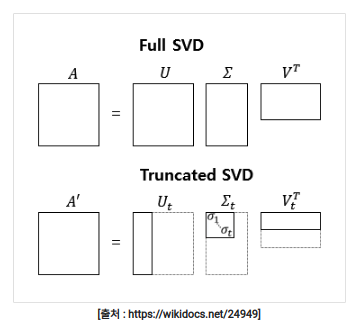

In [16]:
text = 'You say goodbye and i say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

U, S, V = np.linalg.svd(W)
print(U[0])

[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


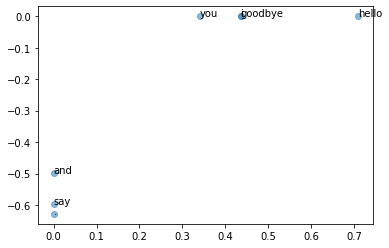

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)
plt.show()

## PTB 데이터셋

In [24]:
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('Create Co-occurrence Matrix...')
C = create_co_matrix(corpus, vocab_size, window_size)

print('PPMI 계산...')
W = ppmi(C, verbose=True)

try:
    # truncated SVD
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except:
    # SVD
    U, S, V = np.linalg.svd(W)

    
word_vecs = U[:, :wordvec_size]
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

Create Co-occurrence Matrix...
PPMI 계산...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료

[query] you
i : 0.6340877413749695
we : 0.6227731704711914
do : 0.537031710